In [2]:
import numpy as np
P = np.array([[0,0], [0.2, 0.22], [0.1, -0.1],

[1,1], [1.1, 0.9], [0.8, 0.9], [1.1, 0.63],
[0.58, -0.1], [0.63, 0.1], [0.67, -0.3], [0.8,-0.23],
[0.8, 0.6]])

k = 3

In [10]:
import math

# Define two points as tuples (x1, y1) and (x2, y2)
point1 = (2.0, 3.0)
point2 = (4.0, 7.0)

# Calculate the Euclidean distance between the two points
distance = math.sqrt((point1[0] - point2[0])**2 + (point1[1] - point2[1])**2)

# Print the result
print(f"Euclidean distance between the two points: {distance:.2f}")



Euclidean distance between the two points: 4.47


Task1: -Write a function that finds, given a fnite set of points in the plane and an integer
k, the k nearest neighbors of each point in the set using numpy’s vectorized facilities.

In [11]:
def k_nearest_neighbors(points, k):
    # Calculate pairwise Euclidean distances between all points
    pairwise_distances = np.sqrt(np.sum((points[:, np.newaxis] - points) ** 2, axis=2))

    # Set the diagonal elements (distances to self) to a large value
    np.fill_diagonal(pairwise_distances, np.inf)

    # Get the indices of the k nearest neighbors for each point
    k_nearest_indices = np.argsort(pairwise_distances, axis=1)[:, :k]

    # Create an array to store the k nearest neighbors for each point
    k_nearest_neighbors = np.empty((points.shape[0], k, points.shape[1]))

    # Populate the k nearest neighbors array
    for i in range(points.shape[0]):
        k_nearest_neighbors[i] = points[k_nearest_indices[i]]

    return k_nearest_neighbors


In [14]:
# Example usage with your data and k=3
P = np.array([[0,0], [0.2, 0.22], [0.1, -0.1], [1,1], [1.1, 0.9], [0.8, 0.9], [1.1, 0.63], [0.58, -0.1], [0.63, 0.1], [0.67, -0.3], [0.8,-0.23], [0.8, 0.6]])
k = 3

k_nearest = k_nearest_neighbors(P, k)
print("K Nearest Neighbors:")
print(k_nearest)


K Nearest Neighbors:
[[[ 0.1  -0.1 ]
  [ 0.2   0.22]
  [ 0.58 -0.1 ]]

 [[ 0.    0.  ]
  [ 0.1  -0.1 ]
  [ 0.63  0.1 ]]

 [[ 0.    0.  ]
  [ 0.2   0.22]
  [ 0.58 -0.1 ]]

 [[ 1.1   0.9 ]
  [ 0.8   0.9 ]
  [ 1.1   0.63]]

 [[ 1.    1.  ]
  [ 1.1   0.63]
  [ 0.8   0.9 ]]

 [[ 1.    1.  ]
  [ 1.1   0.9 ]
  [ 0.8   0.6 ]]

 [[ 1.1   0.9 ]
  [ 0.8   0.6 ]
  [ 1.    1.  ]]

 [[ 0.63  0.1 ]
  [ 0.67 -0.3 ]
  [ 0.8  -0.23]]

 [[ 0.58 -0.1 ]
  [ 0.8  -0.23]
  [ 0.67 -0.3 ]]

 [[ 0.8  -0.23]
  [ 0.58 -0.1 ]
  [ 0.63  0.1 ]]

 [[ 0.67 -0.3 ]
  [ 0.58 -0.1 ]
  [ 0.63  0.1 ]]

 [[ 0.8   0.9 ]
  [ 1.1   0.63]
  [ 1.1   0.9 ]]]


Task 2: Apply your function to this set of points with k = 3. Plot an arrow from each point
to its k-nearest neighbors.

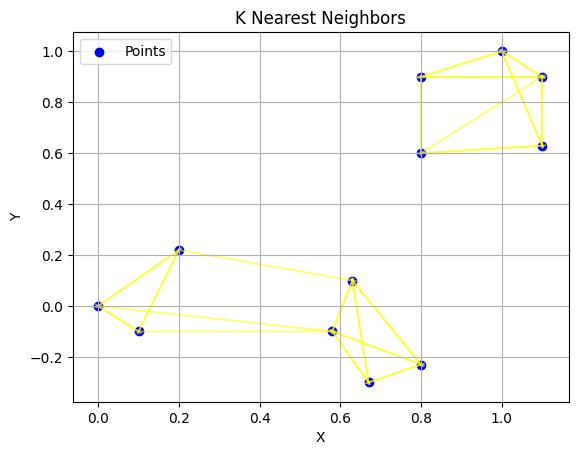

In [15]:
import numpy as np
import matplotlib.pyplot as plt

def k_nearest_neighbors(points, k):
    # Calculate pairwise Euclidean distances between all points
    pairwise_distances = np.sqrt(np.sum((points[:, np.newaxis] - points) ** 2, axis=2))

    # Set the diagonal elements (distances to self) to a large value
    np.fill_diagonal(pairwise_distances, np.inf)

    # Get the indices of the k nearest neighbors for each point
    k_nearest_indices = np.argsort(pairwise_distances, axis=1)[:, :k]

    # Create an array to store the k nearest neighbors for each point
    k_nearest_neighbors = np.empty((points.shape[0], k, points.shape[1]))

    # Populate the k nearest neighbors array
    for i in range(points.shape[0]):
        k_nearest_neighbors[i] = points[k_nearest_indices[i]]

    return k_nearest_neighbors

# Example usage with your data and k=3
P = np.array([[0,0], [0.2, 0.22], [0.1, -0.1], [1,1], [1.1, 0.9], [0.8, 0.9], [1.1, 0.63], [0.58, -0.1], [0.63, 0.1], [0.67, -0.3], [0.8,-0.23], [0.8, 0.6]])
k = 3

k_nearest = k_nearest_neighbors(P, k)

# Plotting the points
plt.scatter(P[:, 0], P[:, 1], c='blue', label='Points')

# Plotting arrows from each point to its k-nearest neighbors
for i in range(P.shape[0]):
    for j in range(k):
        plt.arrow(P[i, 0], P[i, 1], k_nearest[i, j, 0] - P[i, 0], k_nearest[i, j, 1] - P[i, 1],
                  head_width=0.005, head_length=0.01, fc='yellow', ec='yellow', alpha=0.5)

plt.xlabel('X')
plt.ylabel('Y')
plt.title('K Nearest Neighbors')
plt.legend()
plt.grid(True)
plt.show()